In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest as ztest
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats.stats import pearsonr
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16848\1652345168.py:10: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [5]:
df = pd.read_csv("data-midterm.csv")
df.head()

,TimeToPlay,TimeToStudy,ProfessionalScore,InterviewScore,Sexuality,ExpectedSalary,SocialNetworkingTimeUse,Result
0,0.1,4.4,2.5,F,T,249.6,Much,NO
1,4.1,5.7,3.7,D,L,114.6,Pretty,YES
2,7.3,0.9,2.7,D,T,862.0,Almost,NO
3,6.2,8.8,2.7,D,T,147.2,Almost,YES
4,5.0,3.1,0.2,D,Q,653.4,Pretty,NO


1

                            OLS Regression Results                            
Dep. Variable:      ProfessionalScore   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2454
Date:                Wed, 09 Oct 2024   Prob (F-statistic):              0.622
Time:                        19:13:48   Log-Likelihood:                -122.86
No. Observations:                  81   AIC:                             249.7
Df Residuals:                      79   BIC:                             254.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.6969      0.257      6.591      

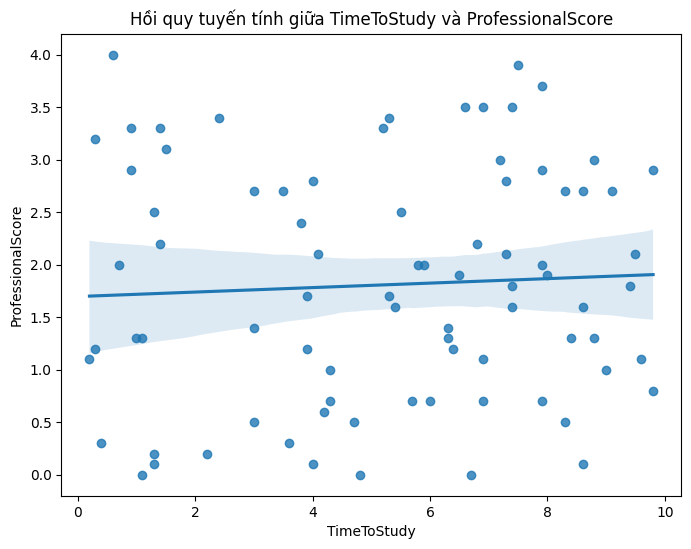

In [47]:
 #Lọc dữ liệu: Xu hướng giới tính là "G" và kết quả phỏng vấn là "NO"
df_filtered = df[(df['Sexuality'] == 'G') & (df['Result'] == 'NO')]

if df_filtered.empty:
    print("Không có dữ liệu phù hợp với điều kiện 'Sexuality = G' và 'Result = NO'.")
else:
    X = df_filtered[['TimeToStudy']]
    y = df_filtered['ProfessionalScore']

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    print(model.summary())

    plt.figure(figsize=(8, 6))
    sns.regplot(x='TimeToStudy', y='ProfessionalScore', data=df_filtered)
    plt.title('Hồi quy tuyến tính giữa TimeToStudy và ProfessionalScore')
    plt.show()

2

In [46]:

desc = df['ProfessionalScore'].describe()

Q3 = desc['75%']

print(f"25% số lượng sinh viên có điểm đánh giá năng lực cao hơn: {Q3}")

df['ProfessionalScore'].quantile(.25)
desc

25% số lượng sinh viên có điểm đánh giá năng lực cao hơn: 2.9


count    1000.000000
mean        1.939700
std         1.142383
min         0.000000
25%         1.000000
50%         2.000000
75%         2.900000
max         4.000000
Name: ProfessionalScore, dtype: float64

3

In [9]:
contingency_table = pd.crosstab(df['Sexuality'], df['Result'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Bảng chéo (Contingency Table):")
print(contingency_table)
print(f"\nChi-squared statistic: {chi2_stat}")
print(f"p-value: {p_val}")

alpha = 0.05
if p_val < alpha:
    print("Có mối phụ thuộc giữa kết quả phỏng vấn và xu hướng tính dục (bác bỏ giả thuyết H0).")
else:
    print("Không có mối phụ thuộc giữa kết quả phỏng vấn và xu hướng tính dục (không bác bỏ giả thuyết H0).")

Bảng chéo (Contingency Table):
Result      NO  YES
Sexuality          
B           64   69
G           81   66
L          106   96
Q          210  203
T           64   41

Chi-squared statistic: 4.882577424112614
p-value: 0.29955935965316594
Không có mối phụ thuộc giữa kết quả phỏng vấn và xu hướng tính dục (không bác bỏ giả thuyết H0).


4

In [10]:
X = df[['TimeToPlay', 'TimeToStudy']]
y = df['ProfessionalScore']

X_with_constant = sm.add_constant(X)

model = sm.OLS(y, X_with_constant).fit()

print(model.summary())

new_data = pd.DataFrame({'const': 1, 'TimeToPlay': [7.0], 'TimeToStudy': [5.0]})
predicted_score = model.predict(new_data)

print(f"Điểm đánh giá năng lực được dự đoán: {predicted_score[0]}")

                            OLS Regression Results                            
Dep. Variable:      ProfessionalScore   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.253
Date:                Wed, 09 Oct 2024   Prob (F-statistic):              0.286
Time:                        18:31:46   Log-Likelihood:                -1550.3
No. Observations:                1000   AIC:                             3107.
Df Residuals:                     997   BIC:                             3121.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8134      0.096     18.860      

5

6

7

In [13]:
from scipy.stats import ttest_rel
df_filtered = df[(df['Sexuality'] == 'T') & (df['InterviewScore'] == 'B')]

if df_filtered.empty:
    print("Không có dữ liệu phù hợp với điều kiện 'Sexuality = T' và 'InterviewScore = B'.")
else:
    t_stat, p_value = ttest_rel(df_filtered['TimeToPlay'], df_filtered['TimeToStudy'])

    print(f"t-statistic: {t_stat}")
    print(f"p-value: {p_value}")

    alpha = 0.05
    if p_value < alpha:
        print("Có sự khác biệt đáng kể giữa trung bình TimeToPlay và TimeToStudy (bác bỏ H0).")
    else:
        print("Không có sự khác biệt đáng kể giữa trung bình TimeToPlay và TimeToStudy (không bác bỏ H0).")

t-statistic: -1.339502822526778
p-value: 0.20174747333359874
Không có sự khác biệt đáng kể giữa trung bình TimeToPlay và TimeToStudy (không bác bỏ H0).


In [17]:
df_filtered.shape

(15, 8)

In [18]:
stats.ttest_ind(df_filtered['TimeToPlay'], df_filtered['TimeToStudy'], equal_var=True)

TtestResult(statistic=np.float64(-0.8066329122653516), pvalue=np.float64(0.42667670534192237), df=np.float64(28.0))

8

In [20]:
df['Score_Bin'] = pd.qcut(df['ProfessionalScore'], q=[0, 0.2, 0.5, 0.6, 0.8, 1], labels=['A', 'B', 'C', 'D', 'E'])

score_to_check = 2.7
result = df[df['ProfessionalScore'] == score_to_check]['Score_Bin']

print(f"Giá trị ProfessionalScore = {score_to_check} thuộc khoảng: {result.values[0]}")

df.head()

Giá trị ProfessionalScore = 2.7 thuộc khoảng: D


,TimeToPlay,TimeToStudy,ProfessionalScore,InterviewScore,Sexuality,ExpectedSalary,SocialNetworkingTimeUse,Result,Score_Bin
0,0.1,4.4,2.5,F,T,249.6,Much,NO,D
1,4.1,5.7,3.7,D,L,114.6,Pretty,YES,E
2,7.3,0.9,2.7,D,T,862.0,Almost,NO,D
3,6.2,8.8,2.7,D,T,147.2,Almost,YES,D
4,5.0,3.1,0.2,D,Q,653.4,Pretty,NO,A


9

In [21]:
crosstab_table = pd.crosstab(df['Sexuality'], df['InterviewScore'])

print("Bảng Crosstab:")
print(crosstab_table)

min_value = crosstab_table.min().min()

min_group = crosstab_table.stack().idxmin()

print(f"Giá trị nhỏ nhất trong bảng crosstab là {min_value}, thuộc nhóm: {min_group}")

Bảng Crosstab:
InterviewScore   A   B    C    D   F
Sexuality                           
B                5  24   30   42  32
G                8  19   40   46  34
L                9  37   64   54  38
Q               16  65  126  122  84
T                6  15   31   32  21
Giá trị nhỏ nhất trong bảng crosstab là 5, thuộc nhóm: ('B', 'A')


10

In [23]:
most_common_interview_score = df['InterviewScore'].mode()[0]

print(f"Điểm phỏng vấn phổ biến nhất là: {most_common_interview_score}")

Điểm phỏng vấn phổ biến nhất là: D


11

In [25]:
X = df[['TimeToPlay', 'TimeToStudy']]
y = df['ProfessionalScore']

X_with_constant = sm.add_constant(X)

model = sm.OLS(y, X_with_constant).fit()

print(model.summary())

coefficients = model.params
time_to_play_coef = coefficients['TimeToPlay']
time_to_study_coef = coefficients['TimeToStudy']

if abs(time_to_play_coef) > abs(time_to_study_coef):
    print(f"Thời gian dành cho việc riêng (TimeToPlay) có mức độ tác động lớn hơn đến điểm đánh giá năng lực.")
else:
    print(f"Thời gian dành cho việc học (TimeToStudy) có mức độ tác động lớn hơn đến điểm đánh giá năng lực.")

                            OLS Regression Results                            
Dep. Variable:      ProfessionalScore   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.253
Date:                Wed, 09 Oct 2024   Prob (F-statistic):              0.286
Time:                        18:45:04   Log-Likelihood:                -1550.3
No. Observations:                1000   AIC:                             3107.
Df Residuals:                     997   BIC:                             3121.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8134      0.096     18.860      

12

In [26]:
bins = [0, 5, 7, 9, np.inf]
labels = ['Bad', 'Pretty', 'Good', 'Excellent']

df['Study_Category'] = pd.cut(df['TimeToStudy'], bins=bins, labels=labels)

count_good = df[df['Study_Category'] == 'Good'].shape[0]

print(f"Số lượng phần tử thuộc nhóm nhãn 'Good': {count_good}")

Số lượng phần tử thuộc nhóm nhãn 'Good': 203


13

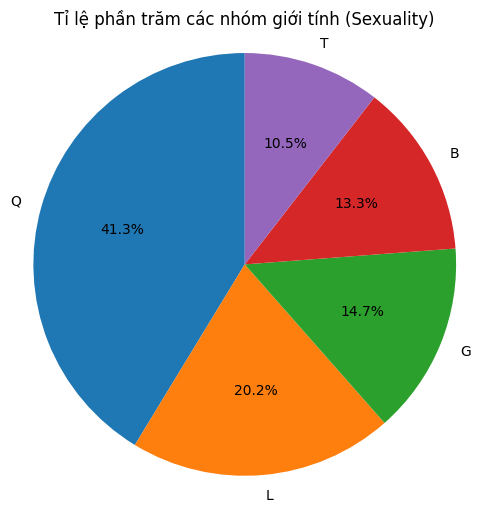

Tỉ lệ phần trăm các nhóm giới tính:
Sexuality
Q    41.3
L    20.2
G    14.7
B    13.3
T    10.5
Name: proportion, dtype: float64


In [27]:
sexuality_counts = df['Sexuality'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,6))
plt.pie(sexuality_counts, labels=sexuality_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Tỉ lệ phần trăm các nhóm giới tính (Sexuality)')
plt.axis('equal')  # Đảm bảo biểu đồ hình tròn
plt.show()

print("Tỉ lệ phần trăm các nhóm giới tính:")
print(sexuality_counts)

14

15

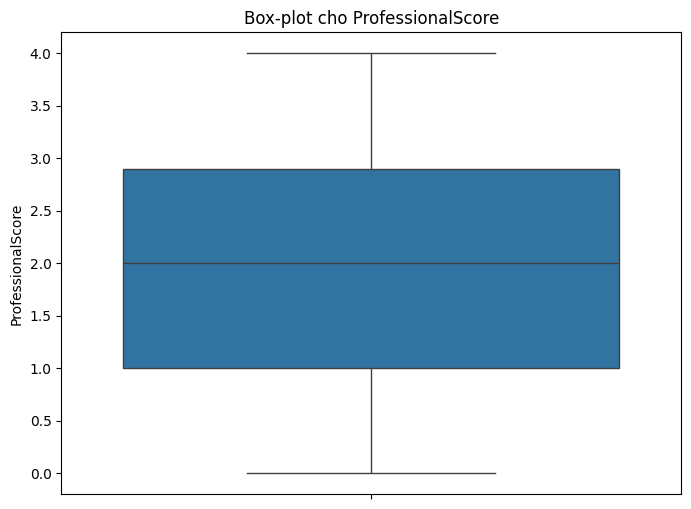

Giới hạn dưới: -1.8499999999999996
Giới hạn trên: 5.75
Giá trị bất thường (outliers):
Empty DataFrame
Columns: [TimeToPlay, TimeToStudy, ProfessionalScore, InterviewScore, Sexuality, ExpectedSalary, SocialNetworkingTimeUse, Result, Score_Bin, Study_Category]
Index: []


In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['ProfessionalScore'])
plt.title('Box-plot cho ProfessionalScore')
plt.ylabel('ProfessionalScore')
plt.show()

Q1 = df['ProfessionalScore'].quantile(0.25)
Q3 = df['ProfessionalScore'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['ProfessionalScore'] < lower_bound) | (df['ProfessionalScore'] > upper_bound)]

print(f"Giới hạn dưới: {lower_bound}")
print(f"Giới hạn trên: {upper_bound}")
print(f"Giá trị bất thường (outliers):\n{outliers}")

16

In [29]:
Q1 = df['ProfessionalScore'].quantile(0.25)
Q3 = df['ProfessionalScore'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25% phân vị): {Q1}")
print(f"Q3 (75% phân vị): {Q3}")
print(f"IQR (Khoảng tứ phân vị): {IQR}")
print(f"Giới hạn dưới cho dữ liệu bất thường: {lower_bound}")
print(f"Giới hạn trên cho dữ liệu bất thường: {upper_bound}")

Q1 (25% phân vị): 1.0
Q3 (75% phân vị): 2.9
IQR (Khoảng tứ phân vị): 1.9
Giới hạn dưới cho dữ liệu bất thường: -1.8499999999999996
Giới hạn trên cho dữ liệu bất thường: 5.75


17

In [30]:

min_value = df['TimeToStudy'].min()
max_value = df['TimeToStudy'].max()

number_of_bins = 20
bin_width = (max_value - min_value) / number_of_bins

print(f"Độ lớn của mỗi bin là: {bin_width}")

Độ lớn của mỗi bin là: 0.5


<Axes: >

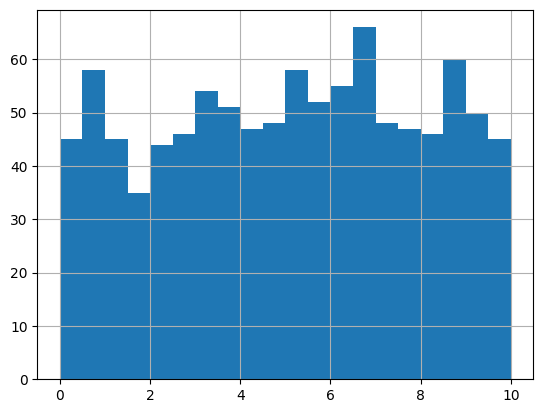

In [31]:
df['TimeToStudy'].hist(bins=20)

18

In [37]:
overall_mean = df['ProfessionalScore'].mean()

mean_by_sexuality = df.groupby('Sexuality')['ProfessionalScore'].mean()

higher_than_mean = mean_by_sexuality[mean_by_sexuality > overall_mean]

print(f"Trung bình điểm đánh giá năng lực của tất cả sinh viên: {overall_mean}")
print("\nNhững nhóm xu hướng tính dục có điểm đánh giá năng lực lớn hơn trung bình:")
print(higher_than_mean)

print(overall_mean)
mean_by_sexuality

Trung bình điểm đánh giá năng lực của tất cả sinh viên: 1.9397

Những nhóm xu hướng tính dục có điểm đánh giá năng lực lớn hơn trung bình:
Sexuality
B    2.025564
Q    1.960533
Name: ProfessionalScore, dtype: float64
1.9397


Sexuality
B    2.025564
G    1.903401
L    1.919307
Q    1.960533
T    1.839048
Name: ProfessionalScore, dtype: float64

19

In [41]:
df.shape

(1000, 10)

20

In [42]:
hypothesized_mean = 2.4575

t_stat, p_value = stats.ttest_1samp(df['ProfessionalScore'], popmean=hypothesized_mean)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Có đủ dữ kiện để bác bỏ giả thuyết H0. Trung bình không bằng 2.4575.")
else:
    print("Không đủ dữ kiện để bác bỏ giả thuyết H0. Trung bình có thể bằng 2.4575.")

t-statistic: -14.333435926932262
p-value: 1.634730670328841e-42
Có đủ dữ kiện để bác bỏ giả thuyết H0. Trung bình không bằng 2.4575.


In [43]:
df['ProfessionalScore'].count

<bound method Series.count of 0      2.5
1      3.7
2      2.7
3      2.7
4      0.2
      ... 
995    1.2
996    2.8
997    1.3
998    3.3
999    0.3
Name: ProfessionalScore, Length: 1000, dtype: float64>

21

22

23

24

25